# 1. Read data

In [3]:
from pathlib import Path


DOCS_DIR = Path("../data/www.robinsonandhenry.com/blog")


html_files = list(DOCS_DIR.rglob("*.html"))

In [4]:
len(html_files)

110

# 2. Extract text

In [16]:
from bs4 import BeautifulSoup
from pathlib import Path


# Define the folder where the downloaded HTML files are stored
DOCS_DIR = Path("../data/www.robinsonandhenry.com/blog")

def extract_text_from_html(file_path):
    """Extracts clean text from an HTML file and generates the correct original URL."""
    with open(file_path, "r", encoding="utf-8") as f:
        soup = BeautifulSoup(f, "html.parser")

    # Extract text from the <body>, removing scripts and styles
    text = soup.body.get_text(separator="\n", strip=True) if soup.body else ""

    # Get the relative path from DOCS_DIR
    relative_path = file_path.relative_to(DOCS_DIR)

    # If the file is 'index.html', use only the parent directory for the URL
    if relative_path.name == "index.html":
        source_url = f"https://www.robinsonandhenry.com/blog/{relative_path.parent}/"
    else:
        source_url = f"https://www.robinsonandhenry.com/blog/{relative_path.stem}/"

    # Normalize the URL by removing double slashes
    source_url = source_url.replace("//", "/")

    return {"source": source_url, "text": text}

# Process all HTML files in the directory
html_files = list(DOCS_DIR.rglob("*.html"))
documents = [extract_text_from_html(path) for path in html_files]

# Display the first 3 extracted documents to verify correct URL formatting
print(documents[:3])


[{'source': 'https:/www.robinsonandhenry.com/blog/./', 'text': 'Chat now\nAbout\nServices\nLocations\nNews & Resources\nContact\nBlog\nShow only video posts\nfilter by\nServices\nBankruptcy\nBusiness Representation\nCriminal Defense\nDisability\nEmployment Law\nEstate Planning & Elder Law\nFamily Law\nImmigration\nInsurance Claim Denials\nIntellectual Property\nLitigation\nMilitary\nPersonal Injury & Car Accidents\nProbate\nReal Estate\nTax and IRS Problems\nPrevious\nNext\nPrevious\nNext\nAbout\nCareers\nOur team\nLocations\nContact\nServices\nCase results\nAsk our attorneys\nIn the media\nBlog\nSitemap\nPrivacy Policy\nTerms & Conditions\nText (SMS) Disclaimer\nAffirm\n© Copyright\n2025\n, Robinson & Henry, P.C.\nJan 21, 2025\n5’ read\nCan I Move Out Before Filing for Divorce?\nJacquelyn Lehecka\nJan 16, 2025\n2’ read\nChoosing the Right Parenting Expert for Your Custody Case\nK. Alexandra Cavin\nJan 10, 2025\n2’ read\nHow Legal Representation is Crucial for Divorce Mediation in Colo

In [17]:
len(documents)

110

In [19]:
documents[11]

{'source': 'https:/www.robinsonandhenry.com/blog/litigation/secured-six-figure-default-judgment-for-plundered-contractor/',
 'text': 'Chat now\nAbout\nServices\nLocations\nNews & Resources\nContact\nBlog\n>\nLitigation\n>\nSecured Six-Figure Default Judgment For Plundered Contractor\nSecured Six-Figure Default Judgment For Plundered Contractor\nDec 31, 2024\n1’ read\nLitigation\nChristopher Davlin\nPartner\n| 18 years of experience\nCall\nSchedule\nChristopher Davlin\nPartner\n18 years of experience\nCall\nSchedule\nPro tip: If you fail to pay your colleague for supplying resources and they serve you with papers, you should make your court appearance a priority. Otherwise, your colleague will automatically win their case, and you may owe three times as much as you did to start.\nThis was the outcome of a case where we obtained a default judgment for our client, netting them over $200,000 in damages and attorney fees.\nOur client is a contractor who supplied parts like windows and doors

# 3. Divide text in chunks

In [20]:
from langchain.text_splitter import RecursiveCharacterTextSplitter


chunk_size = 300
chunk_overlap = 50
text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", " ", ""], 
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    length_function=len,
)


chunks = []
for doc in documents:
    chunked_texts = text_splitter.create_documents(
        texts=[doc["text"]],
        metadatas=[{"source": doc["source"]}]
    )
    for chunk in chunked_texts:
        chunks.append({"text": chunk.page_content, "source": chunk.metadata["source"]})


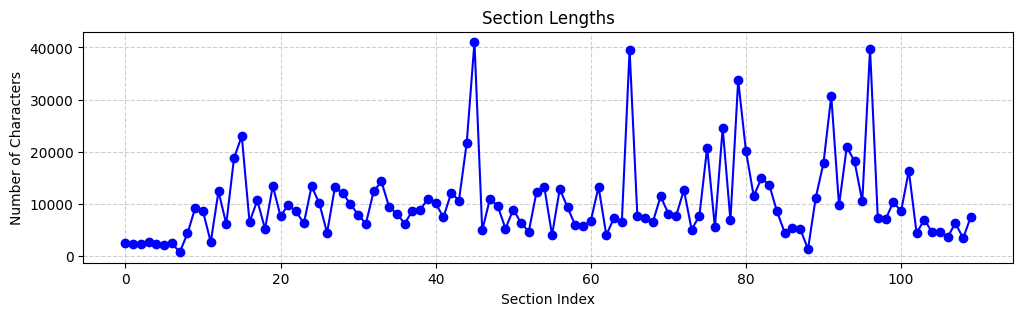

In [21]:
import matplotlib.pyplot as plt

# Extract section lengths from the preprocessed documents
section_lengths = [len(doc["text"]) for doc in documents]  # Compute text length for each section

# Create the plot
plt.figure(figsize=(12, 3))  # Set figure size (width x height)
plt.plot(section_lengths, marker='o', linestyle='-', color='b')  # Plot section lengths with markers
plt.title("Section Lengths")  # Set plot title
plt.ylabel("Number of Characters")  # Label for y-axis
plt.xlabel("Section Index")  # Label for x-axis
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid for better visualization
plt.show()  # Display the plot
